# **Facial Emotion Detection**
# Solution by: 'Femi Bolarinwa

## **Context**
Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial expressions, voice tone, etc. and react appropriately to them.
In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.

##**Objective**

The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Solution Notebook Content Overview:**
- **Libraries importation**
- **Data Exploration**
- **Data pre-processing**
    - **Image Data Loader/Generator**
- **Model Training, Validation and Evaluation**
    - **Model 1 - CNN**
    - **Model 2 - CNN**
    - **Transfer Learning - VGG16**
    - **Transfer Learning - ResNet101**
    - **Transfer Learning - EfficientNetV2B2**
    - **Model 3 - CNN**
- **Conclusion and Recommendation**

## **Mounting the Drive**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing needed Libraries**

In [ ]:
#Library to read zip folder
import zipfile

#Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data manipulation
import numpy as np
import pandas as pd

import os

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#Importing Libraries for transfer learning
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet101, EfficientNetV2B2

#Libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix



### **Loading the data**

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Facial_emotion_images.zip'
#extracting from zip folder
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48 #setting pixel size
folder_path = "Facial_emotion_images/" #saving path name

## **Visualizing the Classes**

### **Happy**

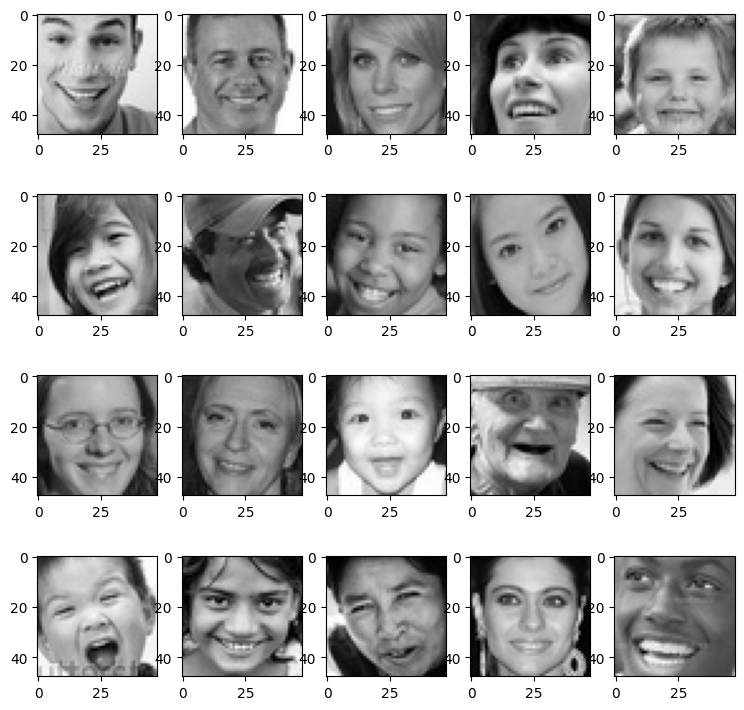

In [ ]:
expression = 'happy'

plt.figure(figsize= (9,9))
for i in range(1, 21, 1):
    plt.subplot(4, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Features of 'Happy:__**
- Mouth usually open.
- Teeth usually visible
- Cheeks raised

### **Sad**

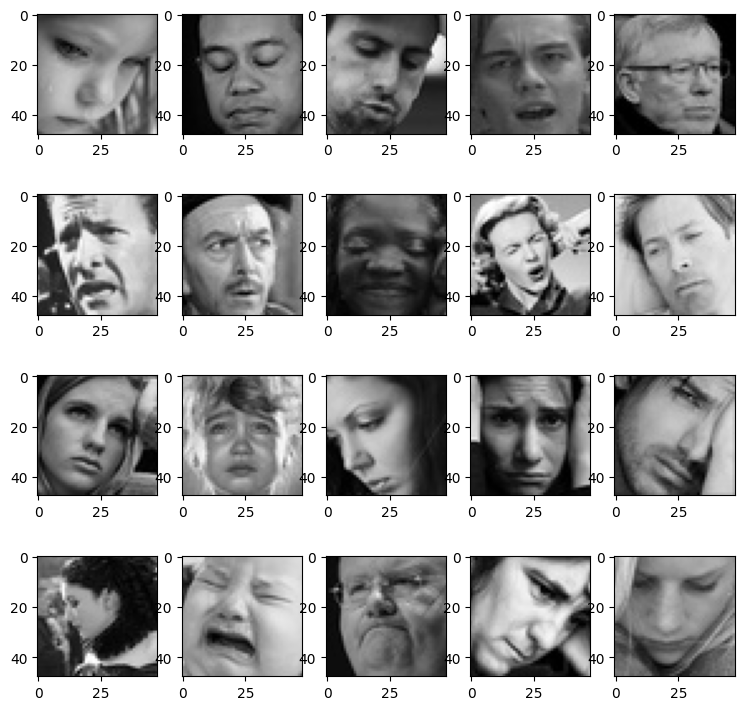

In [ ]:
expression = 'sad'

plt.figure(figsize= (9,9))
for i in range(1, 21, 1):
    plt.subplot(4, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Features of 'Sad':__**
- Resting cheeks
- Squinted eyes and face

### **Neutral**

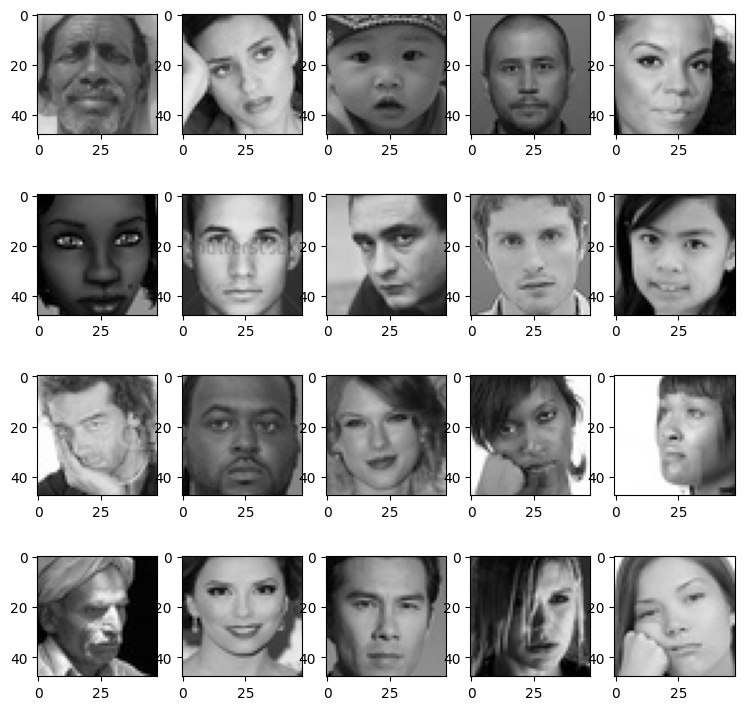

In [ ]:
expression = 'neutral'

plt.figure(figsize= (9,9))
for i in range(1, 21, 1):
    plt.subplot(4, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Features of 'Neutral":__**
- Resting cheeks
- Resting and relax face

### **Surprised**

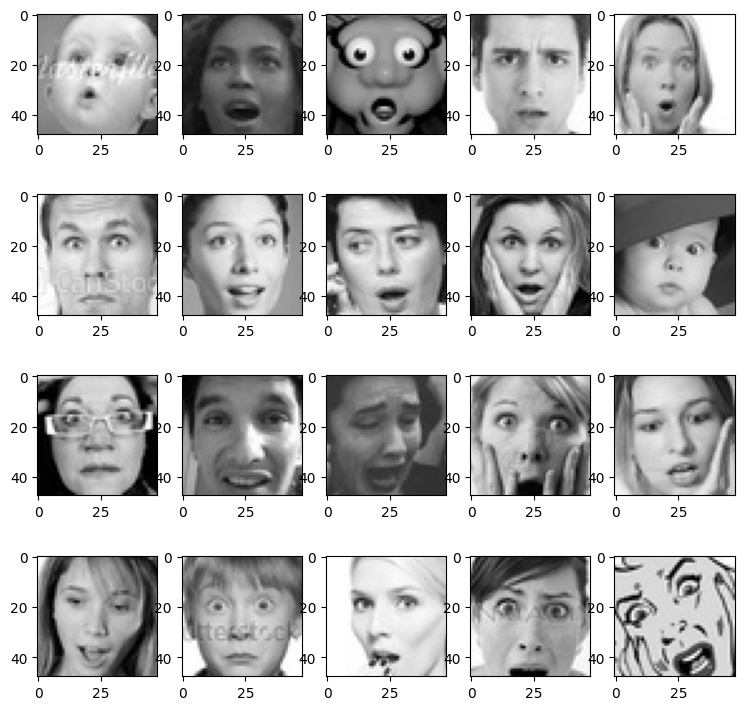

In [ ]:
#visualizing images from the class 'surprise'.
expression = 'surprise'

plt.figure(figsize= (9,9))
for i in range(1, 21, 1):
    plt.subplot(4, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Features of 'Suprised":__**
- Eyes wider than usual
- Resting cheeks
- Stretched face

## **Checking Distribution of Classes In training data**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


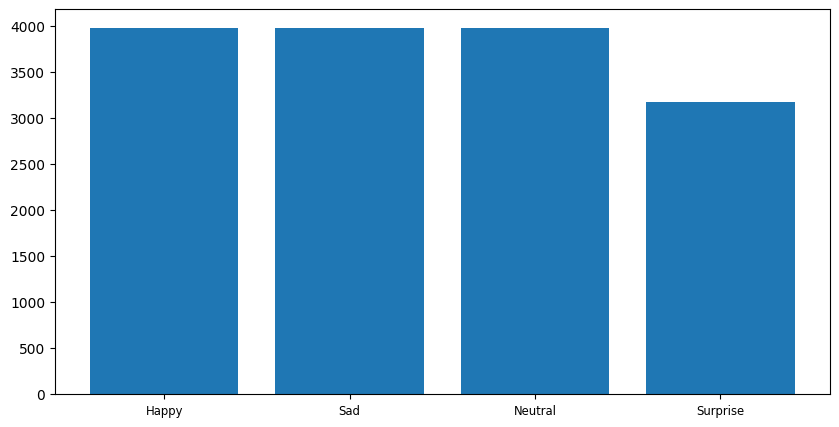

In [ ]:
# Visiualizing distribution with histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:__**
- Evenly distributed classes except 'Suprise"
- However imbalance isn't too high. Deep learning model shouldn't be significantly biased away from 'Suprised'

## **Creating Data Loaders**

In this section, I'll be encoding the images as numbers that will be used as inputs to my Neural Networks.

**There are two options for the color_mode: 3 channels (color_mode='rgb') or 1 channel (color_mode='grayscale'). I'll be using single channel mode to save on computation time**

In [ ]:
batch_size  = 32
img_size = 48

#Encoding images inside training dataset
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

#Encoding images inside validation dataset
datagen_validation  = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

#Encoding images inside test dataset
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


Observation:
- The input zip folder contains 3 folders (train, validation, test)
- Each folder has 4 folders corresponding to the 4 classes (happy, sad, neutral, suprised)

## **Model Building**

* I'll be building Convolutional Neural Networks (CNN) over ordinary Artificial Neural Networks (ANN) since CNN are generally better for feature extraction and hence better classification accuracy

### **Model 1 - CNN**

**Architechure**

My Base Neural network will be a fairly simple model architecture.

* The architecture will have 3 convolutional blocks. Each convolutional block will contain one Conv2D layer followed by a maxpooling layer and one Dropout layer for regularization.

* First Conv2D layer: with **64 filters** and a **kernel size of 2**, use 'same' padding and provide the **input_shape = (48, 48, 1) since my input image data is encoded in 1 channel (grayscale) color mode. Otherwise it would have been input_shape = (48, 48, 3)  if using 3 channels ('rgb') color mode. I'll be using **'relu' activation** for my neurons/nodes, then MaxPooling2D layer with **pool size = 2**, then a Dropout layer with a dropout ratio of 0.2.

* Second Conv2D layer: with **32 filters** and a **kernel size of 2**.**'same' padding** and **'relu' activation.** Followed with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete second Convolutional Block.

* Third Conv2D layer with **32 filters** and a **kernel size of 2**.**'same' padding** and **'relu' activation.** followed with a Maxpooling2D layer and a Dropout layer to complete third Convolutional block.

* Then a Flatten layer to flatten output of convolutional blocks.

* Then first Dense layer with **512 neurons**, **'relu' activation function**, a Dropout layer with dropout ratio of 0.4.

* And then final output Dense Layer with 4 neurons and **'softmax' activation function** since we are dealing with a 4-class clasification problem. Each of the 4 output neurons will provide the probability of the input image belonging to its class

* I'll be printing model summary to see total number of parameters in my NN

In [ ]:
# Initializing a Sequential Model to add my layers sequentially
model1 = Sequential()

#first Convolutional block
model1.add(Conv2D(64, (2, 2), padding="same", input_shape=(48, 48, 1),activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

#second Convolutional block
model1.add(Conv2D(32, (2, 2), padding="same", activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

#third Convolutional block
model1.add(Conv2D(32, (2, 2), padding="same", activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

#Flatten layer
model1.add(Flatten())

# first Dense layer
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.4))

# Final output layer
model1.add(Dense(4, activation = 'softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)       

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#creating abilities to assess/tweak model fitting/training while its ongoing
checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
#I'll compile the model using categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'.

model1.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
#I'll train model for 20 epochs

history = model1.fit(train_set, validation_data = validation_set, verbose = 1, epochs = 20)

Epoch 1/20
473/473 [==============================] - 53s 113ms/step - loss: 1.3267 - accuracy: 0.3459 - val_loss: 1.2500 - val_accuracy: 0.4147
Epoch 2/20
473/473 [==============================] - 64s 135ms/step - loss: 1.2111 - accuracy: 0.4546 - val_loss: 1.1039 - val_accuracy: 0.5232
Epoch 3/20
473/473 [==============================] - 57s 120ms/step - loss: 1.1385 - accuracy: 0.4923 - val_loss: 1.0951 - val_accuracy: 0.5353
Epoch 4/20
473/473 [==============================] - 54s 114ms/step - loss: 1.0865 - accuracy: 0.5224 - val_loss: 1.0141 - val_accuracy: 0.5664
Epoch 5/20
473/473 [==============================] - 54s 115ms/step - loss: 1.0611 - accuracy: 0.5339 - val_loss: 0.9760 - val_accuracy: 0.5883
Epoch 6/20
473/473 [==============================] - 53s 113ms/step - loss: 1.0234 - accuracy: 0.5521 - val_loss: 0.9460 - val_accuracy: 0.6076
Epoch 7/20
473/473 [==============================] - 64s 135ms/step - loss: 1.0038 - accuracy: 0.5643 - val_loss: 0.9338 - val_ac

### **Plotting the validation and training accuracies over epochs**

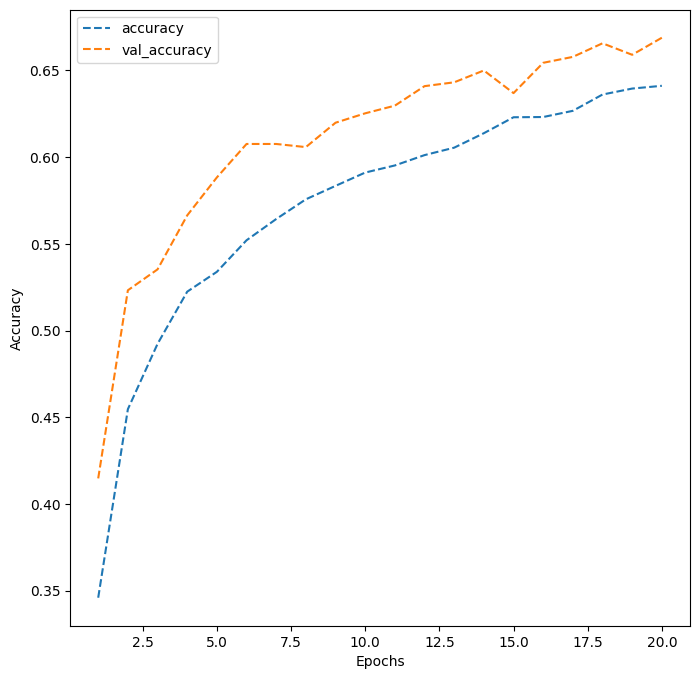

In [ ]:
# Plotting the training and validation accuracies over epochs
dict_hist = history.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
# I'll evaluate model on unseen test data.
accuracy = model1.evaluate(test_set, verbose = 1)

#or
#test_images, test_labels = next(test_set)
#accuracy = model1.evaluate(test_images, test_labels, verbose = 1)

4/4 [==============================] - 0s 29ms/step - loss: 0.7817 - accuracy: 0.6328


**Observations and Insights:__**
- ~64% accuracy on training and unseen test data.
- Model 1 giving a generalized performance, not overfitted.
- Observing the accuracy plots over epochs, model has the ability to achieve better accuracy since the accuracy plots appear to still be climbing. This will come at a cost of excessive computation time. For this project i'll stick to 20 epochs for all NN.

### **Model 2 - CNN**

**Architechure**

In the second Neural network, i will add a few more Convolutional blocks. I will also use Batch Normalization layers to regularize my model.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer.

* First Conv2D layer: **256 filters** and a **kernel size of 2**. 'same' padding and **input_shape = (48, 48, 1) since i'm using 'grayscale' color mode in my dataloader*, **'relu' activation**, BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1*,  MaxPooling2D layer with **pool size = 2**.

* Second Conv2D layer: **128 filters** and a **kernel size of 2**. **'same' padding** and **'relu' activation.**, BatchNormalization, LeakyRelU, and Maxpooling2D layer like above.

* Third Conv2D layer: **64 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation, **BatchNormalization**, LeakyRelU, and Maxpooling2D layer to complete the third Convolutional block.

* Fourth block: with the Conv2D layer having **32 filters**.

* Flatten layer to flatten out of convolutional filter blocks.

* First Dense layer with **512 neurons**, **'relu' activation function**.

* Second Dense Layer with **128 neurons**, use **'relu' activation** function.

* Final Dense Layer with 4 neurons and **'softmax' activation function**

* I' ll print model summary to see total number of parameters in my NN

In [ ]:
# Creating sequential model
model2 = Sequential()

#first Convolutional block
model2.add(Conv2D(256, (2, 2), padding="same", input_shape=(48, 48, 1),activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

#second Convolutional block
model2.add(Conv2D(128, (2, 2), padding="same" ,activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

#third Convolutional block
model2.add(Conv2D(64, (2, 2), padding="same" ,activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

#fourth Convolutional block
model2.add(Conv2D(32, (2, 2), padding="same" ,activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

#Flatten layer
model2.add(Flatten())

#first Dense layer
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
#model1.add(Dropout(0.4))

#Final layer
model2.add(Dense(4, activation = 'softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 256)      1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_15 (Bat  (None, 24, 24, 128)     

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#creating abilities to assess/tweak model fitting/training while its ongoing
checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
#I'll compile the model using categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'.

model2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
#I'll train model for 20 epochs

history = model2.fit(train_set, validation_data = validation_set, verbose = 1, epochs = 20)

Epoch 1/20
473/473 [==============================] - 586s 1s/step - loss: 1.2747 - accuracy: 0.3931 - val_loss: 1.3011 - val_accuracy: 0.3882
Epoch 2/20
473/473 [==============================] - 609s 1s/step - loss: 1.0650 - accuracy: 0.5264 - val_loss: 1.1312 - val_accuracy: 0.5065
Epoch 3/20
473/473 [==============================] - 611s 1s/step - loss: 0.9485 - accuracy: 0.5894 - val_loss: 0.8876 - val_accuracy: 0.6201
Epoch 4/20
473/473 [==============================] - 606s 1s/step - loss: 0.8915 - accuracy: 0.6188 - val_loss: 0.8724 - val_accuracy: 0.6345
Epoch 5/20
473/473 [==============================] - 604s 1s/step - loss: 0.8406 - accuracy: 0.6453 - val_loss: 0.8533 - val_accuracy: 0.6416
Epoch 6/20
473/473 [==============================] - 571s 1s/step - loss: 0.8108 - accuracy: 0.6574 - val_loss: 0.8714 - val_accuracy: 0.6273
Epoch 7/20
473/473 [==============================] - 607s 1s/step - loss: 0.7852 - accuracy: 0.6727 - val_loss: 0.8480 - val_accuracy: 0.6564

### **Plotting the validation and training accuracies**

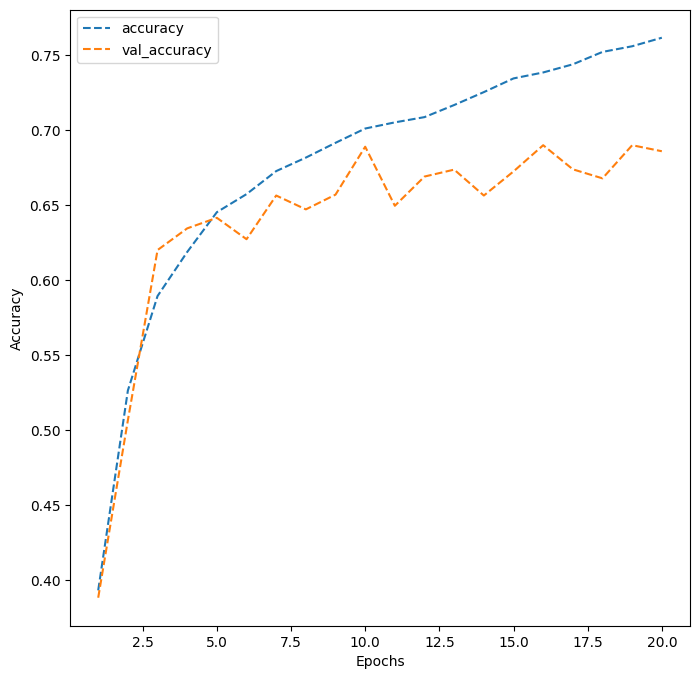

In [ ]:
# Plotting the training and validation accuracies over epochs
dict_hist = history.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
#I'll evaluate model's performance on unseen test data
accuracy = model2.evaluate(test_set, verbose = 1)

4/4 [==============================] - 1s 252ms/step - loss: 0.7053 - accuracy: 0.7266


**Observations and Insights:__**
- Divergent training and validation accuracies. Model might become overfitted if trained for longer epochs
- 72%+ accuracy on training and unseen test data.

## **Transfer Learning Architectures**

In this section, i will create several Transfer Learning architectures. For the pre-trained models, i will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, i need to create new DataLoaders.

### **Creating Data Loaders for Transfer Learning Architectures**

creating data loaders that i will use as inputs to my Neural Network. i will go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size  = 32
img_size = 48

#Encoding images inside training dataset with 3 channels (color_mode = 'rgb',)
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

#Encoding images inside validation dataset with 3 channels (color_mode = 'rgb',)
datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

#Encoding images inside test dataset with 3 channels (color_mode = 'rgb',)
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

#i'll import the VGG16 Convolutional and pooling layers and exclude the fully-connected layers
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
#vgg.summary()

### **Model Building**

* I have imported the VGG model till the **'block5_pool'** layer of the VGG16 model.
* I'll make sure the imported VGG parameters are not trainable
* Then i will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* i will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers for regularization.
* I will add last dense layer, which must have 4 neurons and a 'softmax' activation function.
* I' ll print model summary to see total number of parameters in my NN

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(vgg.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Adding a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Adding a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Adding a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Adding a Batch Normalization layer
x = BatchNormalization()(x)
x = (LeakyReLU(0.1))(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred =  Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

vggmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#creating abilities to assess/tweak model fitting/training while its ongoing
checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
#I'll compile the vggmodel using categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy' .

vggmodel.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
#I'll train model for 20 epochs

history3 = vggmodel.fit(train_set, validation_data = validation_set, verbose = 1, epochs = 20)

Epoch 1/20
473/473 [==============================] - 529s 1s/step - loss: 1.3068 - accuracy: 0.3803 - val_loss: 1.2040 - val_accuracy: 0.4244
Epoch 2/20
473/473 [==============================] - 540s 1s/step - loss: 1.2180 - accuracy: 0.4451 - val_loss: 1.2154 - val_accuracy: 0.4420
Epoch 3/20
473/473 [==============================] - 544s 1s/step - loss: 1.1920 - accuracy: 0.4581 - val_loss: 1.1568 - val_accuracy: 0.4782
Epoch 4/20
473/473 [==============================] - 529s 1s/step - loss: 1.1769 - accuracy: 0.4712 - val_loss: 1.1779 - val_accuracy: 0.4746
Epoch 5/20
473/473 [==============================] - 543s 1s/step - loss: 1.1683 - accuracy: 0.4781 - val_loss: 1.1870 - val_accuracy: 0.4653
Epoch 6/20
473/473 [==============================] - 541s 1s/step - loss: 1.1513 - accuracy: 0.4876 - val_loss: 1.1807 - val_accuracy: 0.4661
Epoch 7/20
473/473 [==============================] - 531s 1s/step - loss: 1.1423 - accuracy: 0.4922 - val_loss: 1.1395 - val_accuracy: 0.4884

### **Plotting the validation and training accuracies**

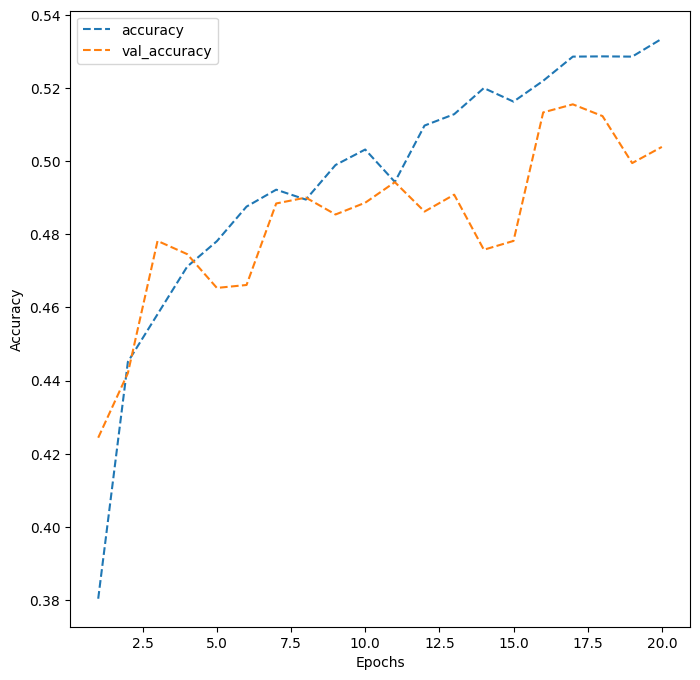

In [ ]:
# Plotting the training and validation accuracies over epochs
dict_hist = history3.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### **Evaluating the VGG16 model on the Unseen Test Data**

In [ ]:
#I'll evaluate model performance on the unseen test set

accuracy = vggmodel.evaluate(test_set, verbose = 1)

4/4 [==============================] - 4s 1s/step - loss: 1.0432 - accuracy: 0.5312


**Observations and Insights:__**
- ~53% accuracy on training and unseen test data.
- Model giving a generalized performance, not overfitted.
- Observing the accuracy plots over epochs, model has the ability to achieve better accuracy since the accuracy plots appear to still be climbing. This will come at a cost of excessive computation time. For this project i'll stick to 20 epochs for all NN.

## **ResNet V2 Model**

### **Importing the ResNet V2 Architecture**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
#Resnet.summary()

171446536/171446536 [==============================] - 8s 0us/step


### **Model Building**

* I have imported till the **'conv5_block3_add'** layer of the ResNet model.
* I'll make sure the imported ResNet parameters are not trainable
* I will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* I will add a few Dense layers and use 'relu' activation function on them.
* I'll use Dropout and BatchNormalization layers as well.
* Then i will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.
* I' ll print model summary to see total number of parameters in my NN

In [ ]:

for layer in Resnet.layers:
    layer.trainable = False

# Flattenning the output from the imported ResNet model
x = Flatten()(Resnet.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Adding a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Adding a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Adding a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Adding a Batch Normalization layer
x = BatchNormalization()(x)
x = (LeakyReLU(0.1))(x)

# Adding the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

resnetmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#creating abilities to assess/tweak model fitting/training while its ongoing
checkpoint = ModelCheckpoint("./resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping =  EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)


reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001).


callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
# I'll compile the resnetmodel using categorical crossentropy as loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'.

resnetmodel.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
#I'll train model for 20 epochs

history4 = resnetmodel.fit(train_set, validation_data = validation_set, verbose = 1, epochs = 20)

Epoch 1/20
473/473 [==============================] - 429s 889ms/step - loss: 1.4425 - accuracy: 0.2565 - val_loss: 1.3833 - val_accuracy: 0.2899
Epoch 2/20
473/473 [==============================] - 360s 762ms/step - loss: 1.3980 - accuracy: 0.2555 - val_loss: 1.3968 - val_accuracy: 0.2431
Epoch 3/20
473/473 [==============================] - 418s 883ms/step - loss: 1.3885 - accuracy: 0.2653 - val_loss: 1.3939 - val_accuracy: 0.2371
Epoch 4/20
473/473 [==============================] - 416s 879ms/step - loss: 1.3920 - accuracy: 0.2612 - val_loss: 1.4071 - val_accuracy: 0.1690
Epoch 5/20
473/473 [==============================] - 417s 883ms/step - loss: 1.3812 - accuracy: 0.2802 - val_loss: 1.4209 - val_accuracy: 0.1722
Epoch 6/20
473/473 [==============================] - 417s 883ms/step - loss: 1.3599 - accuracy: 0.3074 - val_loss: 1.4629 - val_accuracy: 0.1601
Epoch 7/20
473/473 [==============================] - 415s 877ms/step - loss: 1.3781 - accuracy: 0.2722 - val_loss: 1.4383 -

### **Plotting the validation and training accuracies**

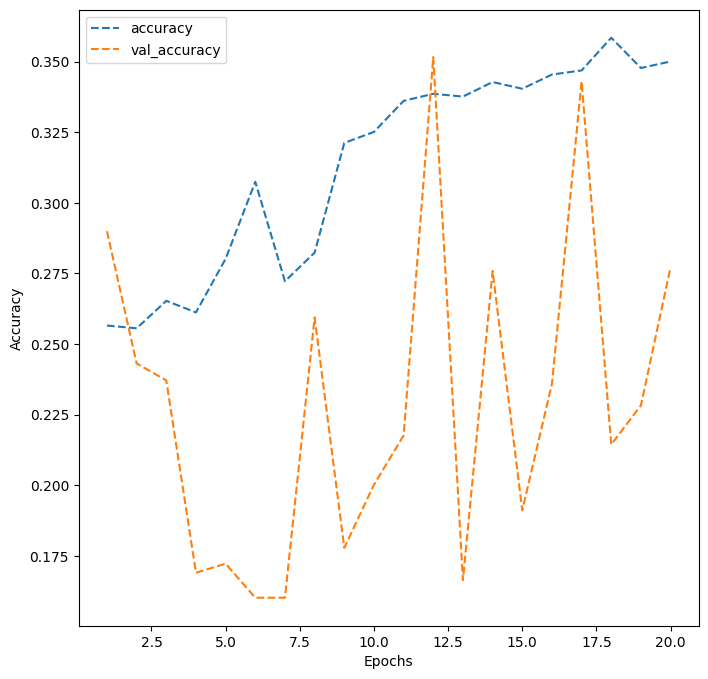

In [ ]:
# Plotting the accuracies over epochs
dict_hist = history4.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### **Evaluating the ResNet Model on Unseen Test Data**

In [ ]:
#I'll evaluate model performance on the unseen test data
accuracy = resnetmodel.evaluate(test_set, verbose = 1)

4/4 [==============================] - 2s 490ms/step - loss: 1.2764 - accuracy: 0.3203


**Observations and Insights:__**
- Divergent training and validation accuracies.
- Model appears erratic during training
- 33%+ accuracy on training and unseen test data.

## **EfficientNet Model**

### **Importing the EfficientNet Architecture**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

EfficientNet = ap.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape= (48, 48, 3))

#EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step


### **Model Building**

In [ ]:

for layer in EfficientNet.layers:
    layer.trainable = False

# Adding  Flatten layer.
x = Flatten()(EfficientNet.output)

# Adding Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation = 'relu')(x)

# Adding Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Adding DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Adding Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)
x = (LeakyReLU(0.1))(x)

# Adding final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation = 'softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)


Efficientnetmodel.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                                                                                              

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#creating abilities to assess/tweak model fitting/training while its ongoing
checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

In [ ]:
# I'll compile the Efficientnetmodel using categorical crossentropy as loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'.

Efficientnetmodel.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
#i'll train model for 20 epochs

history5 = Efficientnetmodel.fit(train_set, validation_data = validation_set, verbose = 1, epochs = 20)

Epoch 1/20
473/473 [==============================] - 180s 346ms/step - loss: 1.4439 - accuracy: 0.2577 - val_loss: 1.3788 - val_accuracy: 0.2289
Epoch 2/20
473/473 [==============================] - 159s 336ms/step - loss: 1.3990 - accuracy: 0.2591 - val_loss: 1.4159 - val_accuracy: 0.1601
Epoch 3/20
473/473 [==============================] - 152s 322ms/step - loss: 1.3943 - accuracy: 0.2616 - val_loss: 1.3580 - val_accuracy: 0.3667
Epoch 4/20
473/473 [==============================] - 158s 335ms/step - loss: 1.3908 - accuracy: 0.2616 - val_loss: 1.3945 - val_accuracy: 0.2289
Epoch 5/20
473/473 [==============================] - 159s 335ms/step - loss: 1.3914 - accuracy: 0.2567 - val_loss: 1.3925 - val_accuracy: 0.2443
Epoch 6/20
473/473 [==============================] - 153s 323ms/step - loss: 1.3897 - accuracy: 0.2642 - val_loss: 1.3993 - val_accuracy: 0.2289
Epoch 7/20
473/473 [==============================] - 154s 326ms/step - loss: 1.3878 - accuracy: 0.2596 - val_loss: 1.3877 -

### **Plotting the validation and training accuracies**

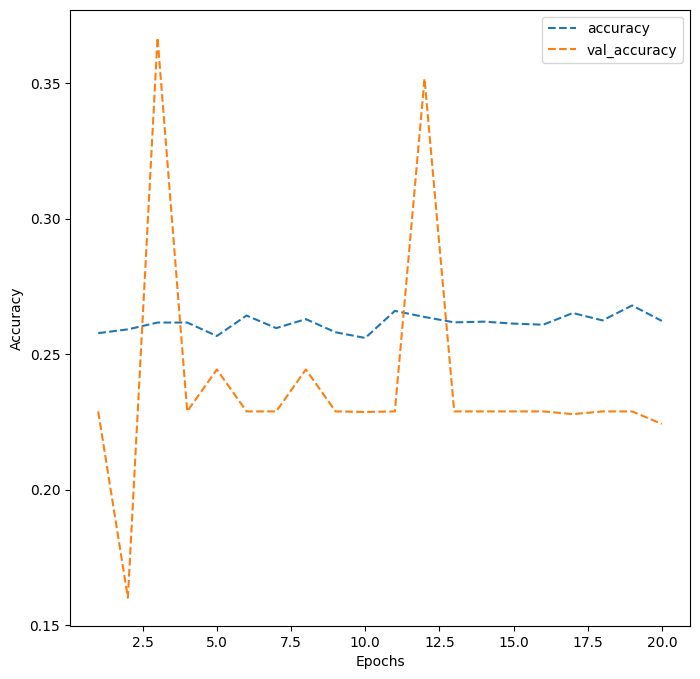

In [ ]:
# Plotting the accuracies
dict_hist = history5.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### **Evaluating the EfficientnetNet Model**

In [ ]:
# I'll evaluate the model performance on the unseen test set
accuracy = Efficientnetmodel.evaluate(test_set, verbose = 1)

4/4 [==============================] - 1s 190ms/step - loss: 1.3893 - accuracy: 0.2656


**Observations and Insights:__**
- Divergent training and validation accuracies.
- Model appears erractic during training
- 23%+ accuracy on training and unseen test data.

Now that i have tried multiple pre-trained models, i'll build a complex CNN architecture and see if i can get a better performance.

## **Building a Complex Neural Network Architecture**

I will build a more complex Convolutional Neural Network Model that has close to as many parameters as i had in our Transfer Learning Models. However, i will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, i'll create data loaders which i will use as inputs to the more Complicated Convolutional Neural Network. i will go ahead with color_mode = 'grayscale'.

In [ ]:
batch_size  = 32
img_size = 48

#Encoding images inside training dataset with 1 channel (color_mode = 'grayscale',)
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


#Encoding images inside validation dataset with 1 channel (color_mode = 'grayscale',)
datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


#Encoding images inside test dataset with 1 channel (color_mode = 'grayscale',)
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Architecture**

* In this network, I'll have 5 Convolutional Blocks
* First Conv2D layer: **64 filters** and a **kernel size of 2**, 'same' padding and  **input shape = (48, 48, 1)**, **'relu' activation** BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**, MaxPooling2D layer with **pool size = 2** and a Dropout layer with a Dropout Ratio of **0.2**.

* Second Conv2D layer: **128 filters** and a **kernel size of 2**, **'same' padding**, **'relu' activation.**, BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete the second Convolutional Block.

* Third Conv2D layer: **512 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.** Once again, BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete the third Convolutional block.

* Fourth block: with the Conv2D layer having **512 filters**.

* Fifth block: having **128 filters**.

* Then Flatten layer, followed by Dense layers.
* First Dense layer: **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms the first Fully Connected block
* Second Dense layer: **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Final Dense layer with 4 neurons.
* I'll print model summary to view number of trainable parameters

In [ ]:
no_of_classes = 4

model3 = Sequential()

#1st CNN Block
model3.add(Conv2D(64, (2, 2), padding="same", input_shape=(48, 48, 1),activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))



#2nd CNN Block
model3.add(Conv2D(128, (2, 2), padding="same",activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

#3rd CNN Block
model3.add(Conv2D(512, (2, 2), padding="same",activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

#4th CNN Block
model3.add(Conv2D(512, (2, 2), padding="same",activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

#5th CNN Block
model3.add(Conv2D(128, (2, 2), padding="same",activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(512, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.2))
model3.add(Dropout(0.2))

model3.add(Dense(no_of_classes, activation = 'softmax'))

model3.summary


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fe558675fc0>>

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

#creating abilities to assess/tweak model fitting/training while its ongoing
epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
# I'll compile model3 using categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.
model3.compile(optimizer = Adam(learning_rate = 0.003), loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
#i'll train model for 20 epochs

history6 = model3.fit(train_set, validation_data = validation_set, verbose = 1, epochs = 20)

Epoch 1/20
473/473 [==============================] - 412s 864ms/step - loss: 1.5744 - accuracy: 0.2680 - val_loss: 1.5552 - val_accuracy: 0.2958
Epoch 2/20
473/473 [==============================] - 392s 830ms/step - loss: 1.4602 - accuracy: 0.2722 - val_loss: 1.4238 - val_accuracy: 0.3195
Epoch 3/20
473/473 [==============================] - 409s 865ms/step - loss: 1.4236 - accuracy: 0.2790 - val_loss: 1.3500 - val_accuracy: 0.3048
Epoch 4/20
473/473 [==============================] - 406s 858ms/step - loss: 1.3920 - accuracy: 0.3002 - val_loss: 1.3359 - val_accuracy: 0.3442
Epoch 5/20
473/473 [==============================] - 393s 831ms/step - loss: 1.3241 - accuracy: 0.3375 - val_loss: 1.3319 - val_accuracy: 0.3167
Epoch 6/20
473/473 [==============================] - 409s 863ms/step - loss: 1.2641 - accuracy: 0.3794 - val_loss: 1.2711 - val_accuracy: 0.4061
Epoch 7/20
473/473 [==============================] - 412s 871ms/step - loss: 1.1920 - accuracy: 0.4428 - val_loss: 1.2659 -

### **Plotting the validation and training accuracies**

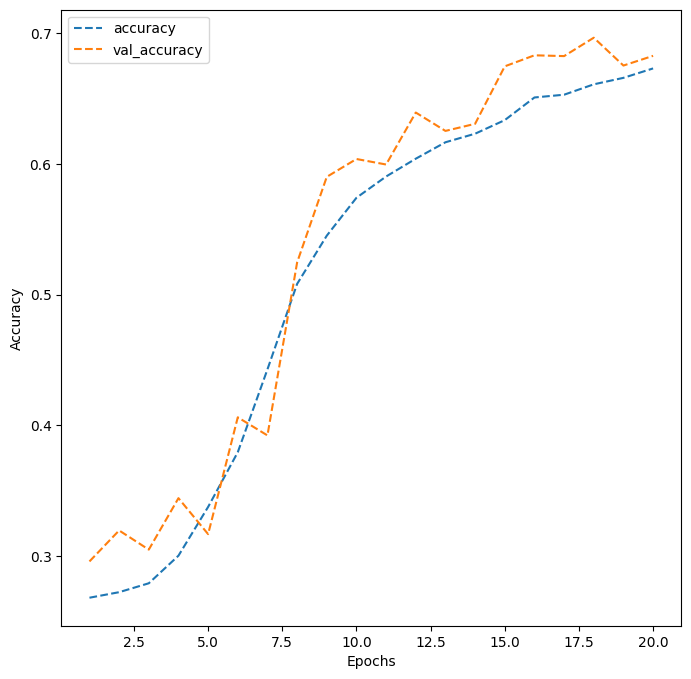

In [ ]:
# Plotting the accuracies
dict_hist = history6.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
# Evaluate the model performance on the unseen test dataset

accuracy = model3.evaluate(test_set, verbose = 1)

4/4 [==============================] - 1s 153ms/step - loss: 0.8243 - accuracy: 0.6406


**Observations and Insights:__**
- ~64%+ accuracy on training and unseen test data.
- Model 3 giving a generalized performance, not overfitted.

### **Plotting the Confusion Matrix for the chosen final model**
I'll be chosing Model3 as my final model to generate classification report of my test images

Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 148ms/step
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.50      0.66      0.57        32
           2       0.50      0.47      0.48        32
           3       1.00      0.69      0.81        32

    accuracy                           0.64       128
   macro avg       0.68      0.64      0.65       128
weighted avg       0.68      0.64      0.65       128



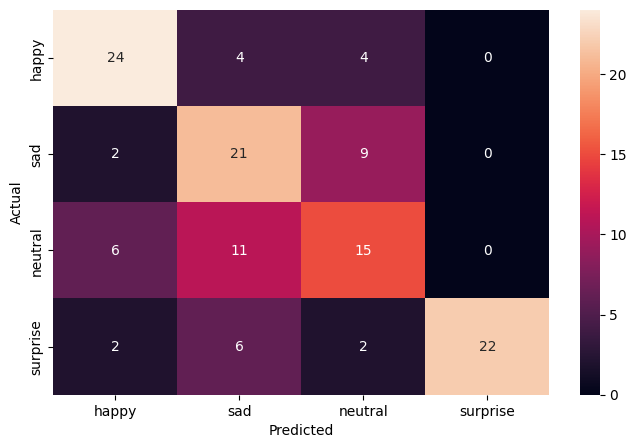

In [ ]:
# Plotting the confusion matrix and generating a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

pred = model3.predict(test_images) #predicting
pred = np.argmax(pred, axis = 1) #extracting class with highest probability from predictions
y_true = np.argmax(test_labels, axis = 1) #extracting class with highest probability from encoded test labels

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**
- 'Neutral' has the most misclassifiication error
- 'Happy' has the least misclassification error
- 'Surprise' has 100% precision
- Model3 has overall accuracy of 64%

## **Conclusion:____________**

- Models 1, 2, 3 and the VGG model have the ability to achieve better accuracy since the accuracy plots appear to still be climbing as seen in the accuracy plots over epochs. This will come at a cost of excessive computation time. For this project, i stuck to 20 epochs for all NN.

- There's always a need to balance architecture complexity and number of training epochs to ensure model training is completed in reasonable time.

- Although Model2 has better accuracy than Model3, Model2 appears to be slight overfit as the training accuracy diverges from the validation accuracy.

- Model3 would be my preffered deep learning model for this project work